In [227]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [165]:
df= pd.read_csv("new_data1.csv")   #use dataset.csv
pd.set_option("display.max_columns", None)
df

,Location,Date,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow
0,Buddhanilakantha,2020-01-01,23.200000,4.500000,94.500000,0.000000,0,0
1,Buddhanilakantha,2020-01-02,20.700000,4.500000,87.300000,0.000000,0,1
2,Buddhanilakantha,2020-01-03,12.900000,5.300000,82.000000,0.000000,0,1
3,Buddhanilakantha,2020-01-04,9.600000,8.100000,100.000000,0.000000,0,0
4,Buddhanilakantha,2020-01-05,19.300000,4.000000,96.900000,17.300000,1,0
...,...,...,...,...,...,...,...,...
58909,Panipokhari(Kathmandu),2015-12-25,19.014497,18.984795,71.004009,0.010054,0,1
58910,Nagarkot,2017-06-26,19.486647,12.038645,6.996157,0.000000,0,1
58911,Godavari,2018-09-05,18.511274,3.982489,48.992664,0.005252,1,0
58912,Godavari,2015-08-24,18.213025,15.998567,81.010678,0.000000,1,0


In [166]:
df['Location'].unique()

array(['Buddhanilakantha', 'Godavari', 'Kathmandu Airport', 'Nagarkot',
       'Panipokhari(Kathmandu)'], dtype=object)

In [167]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 6
Discrete feature Count 2
Continuous feature Count 4
Categorical feature Count 2


In [169]:
print(numerical_feature)

['max_temp', 'min_temp', 'Humidity', 'Rainfall', 'RainToday', 'RainTomorrow']


In [170]:
df

,Location,Date,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow
0,Buddhanilakantha,2020-01-01,23.200000,4.500000,94.500000,0.000000,0,0
1,Buddhanilakantha,2020-01-02,20.700000,4.500000,87.300000,0.000000,0,1
2,Buddhanilakantha,2020-01-03,12.900000,5.300000,82.000000,0.000000,0,1
3,Buddhanilakantha,2020-01-04,9.600000,8.100000,100.000000,0.000000,0,0
4,Buddhanilakantha,2020-01-05,19.300000,4.000000,96.900000,17.300000,1,0
...,...,...,...,...,...,...,...,...
58909,Panipokhari(Kathmandu),2015-12-25,19.014497,18.984795,71.004009,0.010054,0,1
58910,Nagarkot,2017-06-26,19.486647,12.038645,6.996157,0.000000,0,1
58911,Godavari,2018-09-05,18.511274,3.982489,48.992664,0.005252,1,0
58912,Godavari,2015-08-24,18.213025,15.998567,81.010678,0.000000,1,0


In [171]:
df.value_counts().sum


<bound method Series.sum of Location                Date        max_temp   min_temp   Humidity   Rainfall   RainToday  RainTomorrow
Buddhanilakantha        2020-01-01  13.991384  8.705012   72.501186  0.008182   0          0               1
Nagarkot                2018-11-14  14.008373  3.508459   85.088755  30.490964  0          0               1
                        2018-11-15  18.001943  14.913541  87.497687  12.419155  0          1               1
                                    19.505567  13.020220  59.103471  15.529862  0          1               1
                                    30.203818  13.094306  38.904403  0.013033   0          1               1
                                                                                                          ..
Kathmandu Airport       2016-04-30  25.401893  17.212531  92.306927  0.000000   1          1               1
                                    26.977915  15.011499  83.980499  2.084139   1          1             

In [172]:
df.shape

(58914, 8)

<Figure size 2000x2000 with 0 Axes>

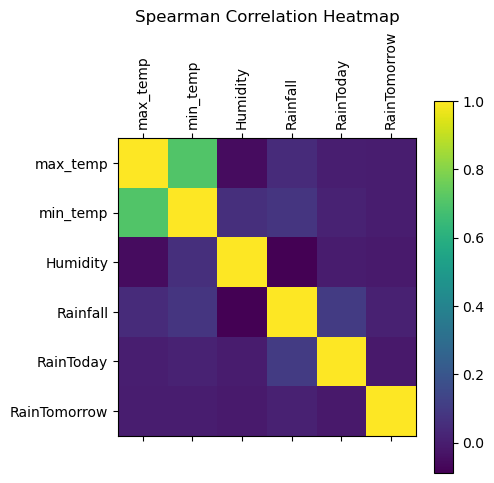

In [173]:


# Drop non-numeric columns or impute them with appropriate values
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corrmat = df_numeric.corr(method='spearman')

# Plot the heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
plt.matshow(corrmat, cmap='viridis')
plt.title('Spearman Correlation Heatmap')
plt.xticks(range(len(corrmat.columns)), corrmat.columns, rotation=90)
plt.yticks(range(len(corrmat.columns)), corrmat.columns)
plt.colorbar()
plt.show()


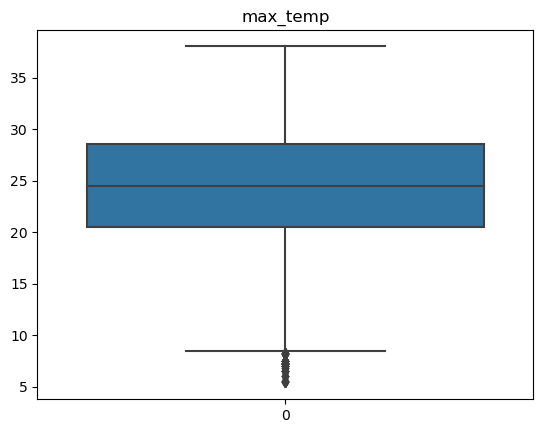

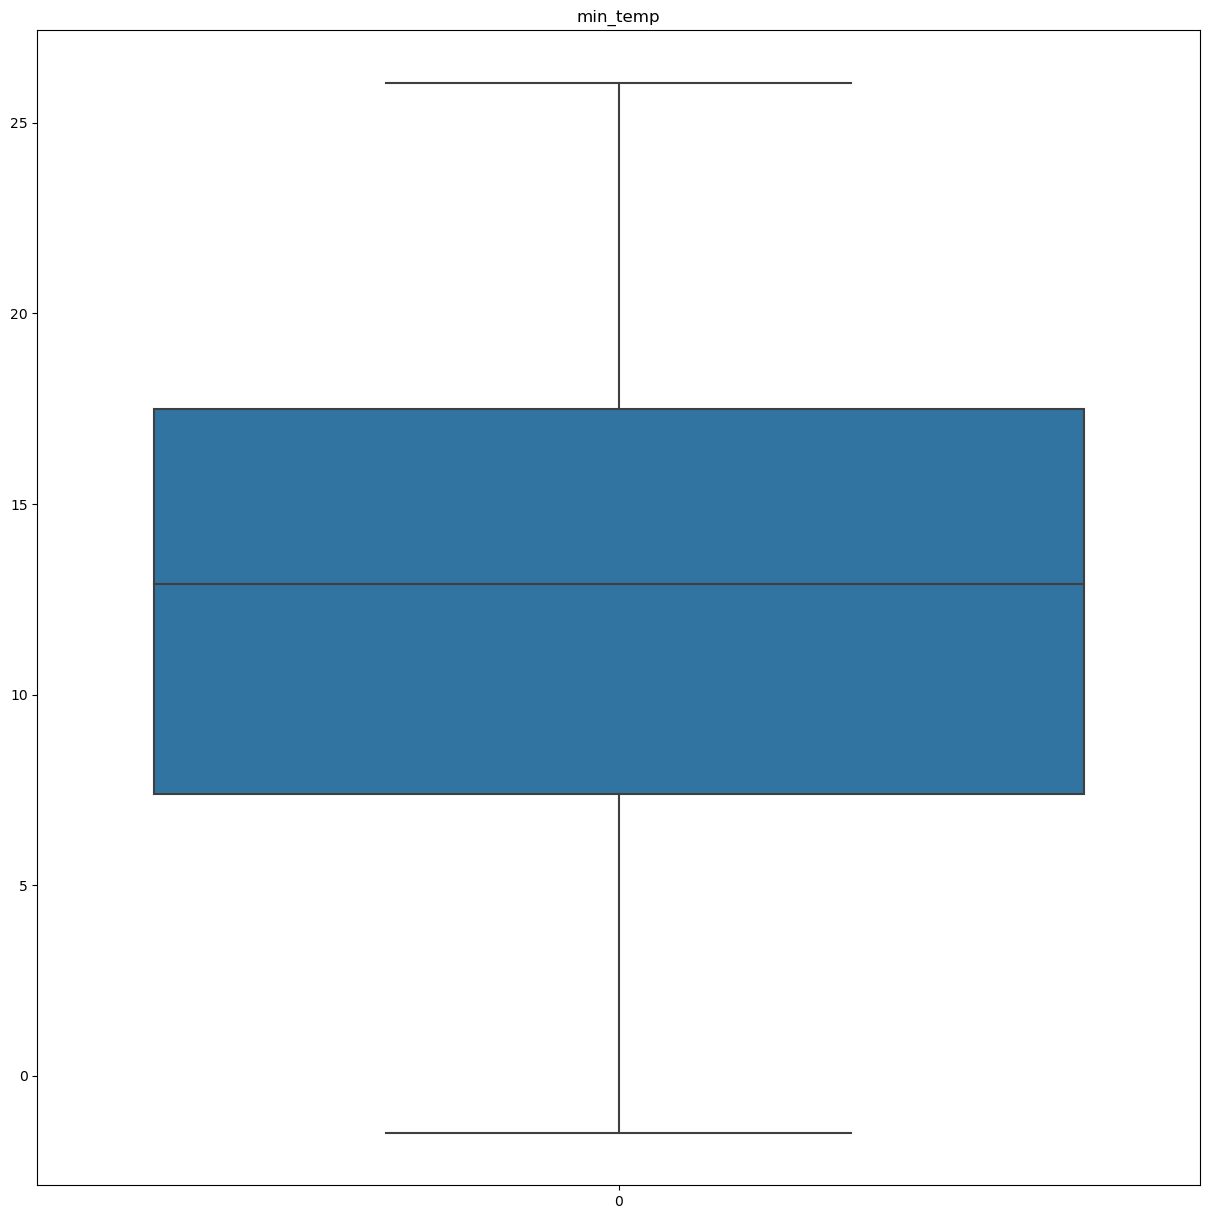

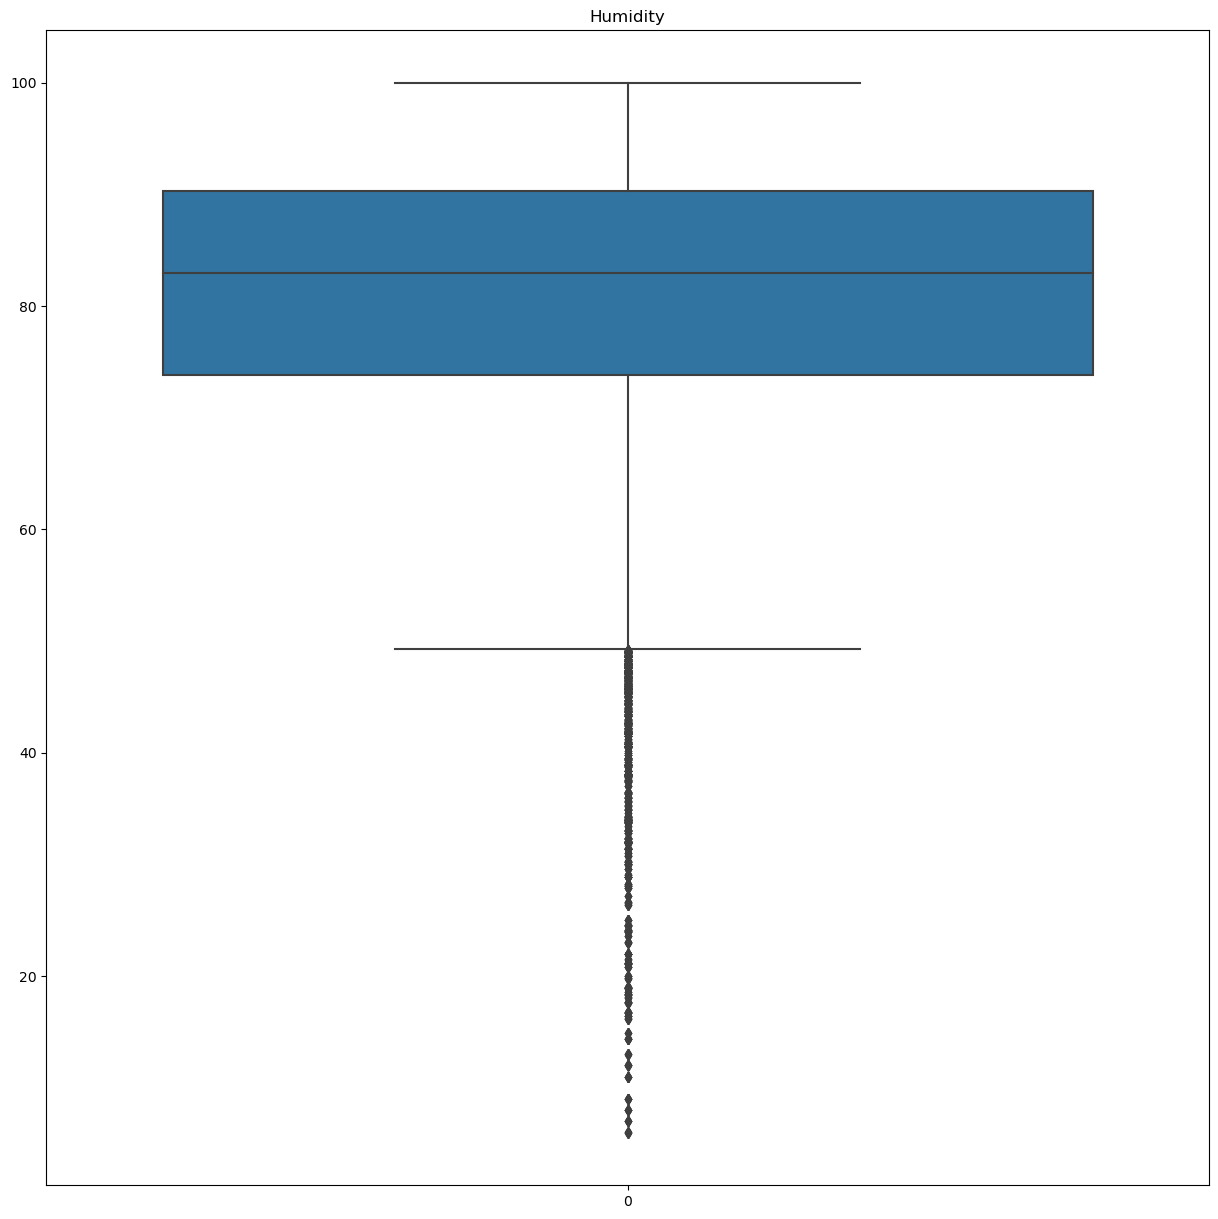

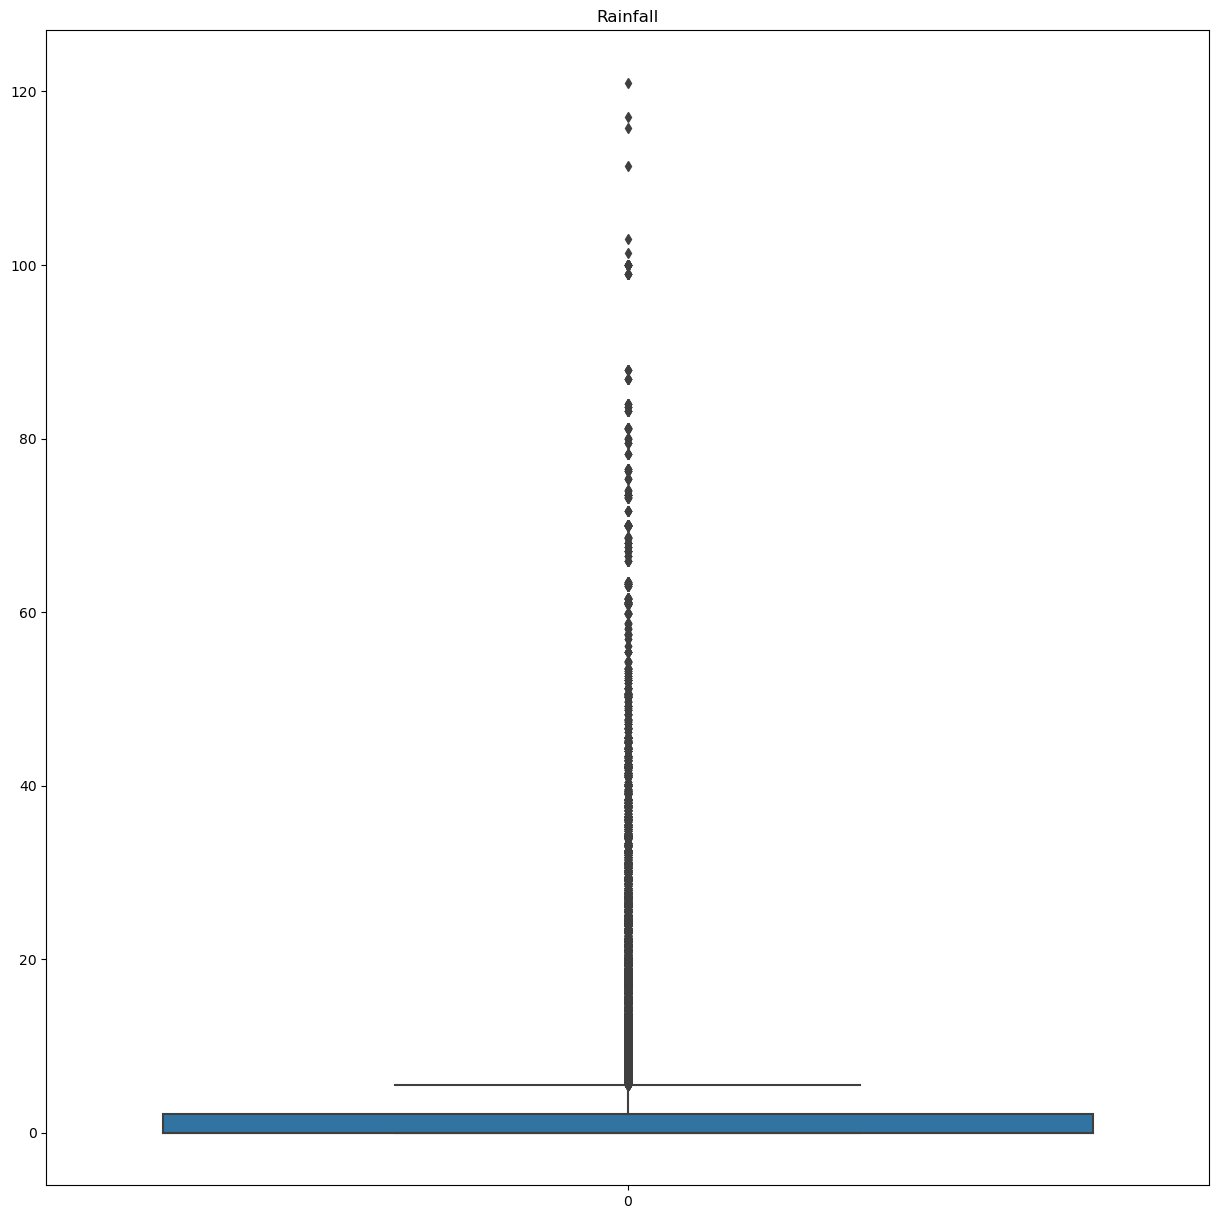

<Figure size 1500x1500 with 0 Axes>

In [175]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [176]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [177]:
df.isnull().sum()*100/len(df)

Location        0.000000
Date            0.381913
max_temp        0.000000
min_temp        0.000000
Humidity        0.000000
Rainfall        0.000000
RainToday       0.000000
RainTomorrow    0.000000
dtype: float64

In [178]:
discrete_feature

['RainToday', 'RainTomorrow']

In [179]:
df

,Location,Date,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow
0,Buddhanilakantha,2020-01-01,23.200000,4.500000,94.500000,0.000000,0,0
1,Buddhanilakantha,2020-01-02,20.700000,4.500000,87.300000,0.000000,0,1
2,Buddhanilakantha,2020-01-03,12.900000,5.300000,82.000000,0.000000,0,1
3,Buddhanilakantha,2020-01-04,9.600000,8.100000,100.000000,0.000000,0,0
4,Buddhanilakantha,2020-01-05,19.300000,4.000000,96.900000,17.300000,1,0
...,...,...,...,...,...,...,...,...
58909,Panipokhari(Kathmandu),2015-12-25,19.014497,18.984795,71.004009,0.010054,0,1
58910,Nagarkot,2017-06-26,19.486647,12.038645,6.996157,0.000000,0,1
58911,Godavari,2018-09-05,18.511274,3.982489,48.992664,0.005252,1,0
58912,Godavari,2015-08-24,18.213025,15.998567,81.010678,0.000000,1,0


In [181]:
df['Location']

0              Buddhanilakantha
1              Buddhanilakantha
2              Buddhanilakantha
3              Buddhanilakantha
4              Buddhanilakantha
                  ...          
58909    Panipokhari(Kathmandu)
58910                  Nagarkot
58911                  Godavari
58912                  Godavari
58913         Kathmandu Airport
Name: Location, Length: 58914, dtype: object

In [182]:
from sklearn.preprocessing import LabelEncoder


In [183]:
label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])
df

,Location,Date,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow
0,0,2020-01-01,23.200000,4.500000,94.500000,0.000000,0,0
1,0,2020-01-02,20.700000,4.500000,87.300000,0.000000,0,1
2,0,2020-01-03,12.900000,5.300000,82.000000,0.000000,0,1
3,0,2020-01-04,9.600000,8.100000,100.000000,0.000000,0,0
4,0,2020-01-05,19.300000,4.000000,96.900000,17.300000,1,0
...,...,...,...,...,...,...,...,...
58909,4,2015-12-25,19.014497,18.984795,71.004009,0.010054,0,1
58910,3,2017-06-26,19.486647,12.038645,6.996157,0.000000,0,1
58911,1,2018-09-05,18.511274,3.982489,48.992664,0.005252,1,0
58912,1,2015-08-24,18.213025,15.998567,81.010678,0.000000,1,0


In [133]:
df

,Location,Date,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow
0,0,2020-01-01,23.200000,4.500000,94.500000,0.000000,0,0
1,0,2020-01-02,20.700000,4.500000,87.300000,0.000000,0,1
2,0,2020-01-03,12.900000,5.300000,82.000000,0.000000,0,1
3,0,2020-01-04,9.600000,8.100000,100.000000,0.000000,0,0
4,0,2020-01-05,19.300000,4.000000,96.900000,17.300000,1,0
...,...,...,...,...,...,...,...,...
58909,4,2015-12-25,19.014497,18.984795,71.004009,0.010054,0,1
58910,3,2017-06-26,19.486647,12.038645,6.996157,0.000000,0,1
58911,1,2018-09-05,18.511274,3.982489,48.992664,0.005252,1,0
58912,1,2015-08-24,18.213025,15.998567,81.010678,0.000000,1,0


In [184]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day into separate columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [135]:
df

,Location,Date,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow,Year,Month,Day
0,0,2020-01-01,23.200000,4.500000,94.500000,0.000000,0,0,2020.0,1.0,1.0
1,0,2020-01-02,20.700000,4.500000,87.300000,0.000000,0,1,2020.0,1.0,2.0
2,0,2020-01-03,12.900000,5.300000,82.000000,0.000000,0,1,2020.0,1.0,3.0
3,0,2020-01-04,9.600000,8.100000,100.000000,0.000000,0,0,2020.0,1.0,4.0
4,0,2020-01-05,19.300000,4.000000,96.900000,17.300000,1,0,2020.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
58909,4,2015-12-25,19.014497,18.984795,71.004009,0.010054,0,1,2015.0,12.0,25.0
58910,3,2017-06-26,19.486647,12.038645,6.996157,0.000000,0,1,2017.0,6.0,26.0
58911,1,2018-09-05,18.511274,3.982489,48.992664,0.005252,1,0,2018.0,9.0,5.0
58912,1,2015-08-24,18.213025,15.998567,81.010678,0.000000,1,0,2015.0,8.0,24.0


In [186]:
df.drop(['Date'],axis=1,inplace=True)

In [187]:
df

,Location,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow,Year,Month,Day
0,0,23.200000,4.500000,94.500000,0.000000,0,0,2020.0,1.0,1.0
1,0,20.700000,4.500000,87.300000,0.000000,0,1,2020.0,1.0,2.0
2,0,12.900000,5.300000,82.000000,0.000000,0,1,2020.0,1.0,3.0
3,0,9.600000,8.100000,100.000000,0.000000,0,0,2020.0,1.0,4.0
4,0,19.300000,4.000000,96.900000,17.300000,1,0,2020.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
58909,4,19.014497,18.984795,71.004009,0.010054,0,1,2015.0,12.0,25.0
58910,3,19.486647,12.038645,6.996157,0.000000,0,1,2017.0,6.0,26.0
58911,1,18.511274,3.982489,48.992664,0.005252,1,0,2018.0,9.0,5.0
58912,1,18.213025,15.998567,81.010678,0.000000,1,0,2015.0,8.0,24.0


In [188]:
len(df)

58914

In [189]:
df.shape

(58914, 10)

In [190]:

# row_limit = 40000

# # Keep only the first 2000 rows
# df = df.head(row_limit)

# # Display the first few rows of the modified dataframe
# print(df.head())


   Location  max_temp  min_temp  Humidity  Rainfall  RainToday  RainTomorrow  \
0         0      23.2       4.5      94.5       0.0          0             0   
1         0      20.7       4.5      87.3       0.0          0             1   
2         0      12.9       5.3      82.0       0.0          0             1   
3         0       9.6       8.1     100.0       0.0          0             0   
4         0      19.3       4.0      96.9      17.3          1             0   

     Year  Month  Day  
0  2020.0    1.0  1.0  
1  2020.0    1.0  2.0  
2  2020.0    1.0  3.0  
3  2020.0    1.0  4.0  
4  2020.0    1.0  5.0  


In [191]:
df.shape

(40000, 10)

In [192]:
df.isnull().sum()*100/len(df)

Location        0.0000
max_temp        0.0000
min_temp        0.0000
Humidity        0.0000
Rainfall        0.0000
RainToday       0.0000
RainTomorrow    0.0000
Year            0.3675
Month           0.3675
Day             0.3675
dtype: float64

In [193]:
columns_to_fill = ['Year', 'Month', 'Day']
df[columns_to_fill] = df[columns_to_fill].fillna(method='ffill')

/tmp/ipykernel_6330/2835961537.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[columns_to_fill] = df[columns_to_fill].fillna(method='ffill')
/tmp/ipykernel_6330/2835961537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_fill] = df[columns_to_fill].fillna(method='ffill')


In [194]:
df

,Location,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow,Year,Month,Day
0,0,23.200000,4.500000,94.500000,0.000000,0,0,2020.0,1.0,1.0
1,0,20.700000,4.500000,87.300000,0.000000,0,1,2020.0,1.0,2.0
2,0,12.900000,5.300000,82.000000,0.000000,0,1,2020.0,1.0,3.0
3,0,9.600000,8.100000,100.000000,0.000000,0,0,2020.0,1.0,4.0
4,0,19.300000,4.000000,96.900000,17.300000,1,0,2020.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
39995,3,18.516800,8.023313,16.783941,43.383493,0,0,2015.0,7.0,2.0
39996,1,17.503272,7.001895,18.083842,13.287317,0,0,2015.0,3.0,11.0
39997,4,18.478213,4.383743,66.712286,3.086009,0,0,2020.0,2.0,1.0
39998,3,19.026767,3.988764,71.489172,0.019966,0,0,2015.0,6.0,6.0


In [195]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
df1

RainTomorrow,0,1
Location,,
0,842,816
1,4932,4637
2,4721,4665
3,4927,4803
4,4620,5037


In [196]:
df.isnull().sum()*100/len(df)

Location        0.0
max_temp        0.0
min_temp        0.0
Humidity        0.0
Rainfall        0.0
RainToday       0.0
RainTomorrow    0.0
Year            0.0
Month           0.0
Day             0.0
dtype: float64

In [197]:
df

,Location,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow,Year,Month,Day
0,0,23.200000,4.500000,94.500000,0.000000,0,0,2020.0,1.0,1.0
1,0,20.700000,4.500000,87.300000,0.000000,0,1,2020.0,1.0,2.0
2,0,12.900000,5.300000,82.000000,0.000000,0,1,2020.0,1.0,3.0
3,0,9.600000,8.100000,100.000000,0.000000,0,0,2020.0,1.0,4.0
4,0,19.300000,4.000000,96.900000,17.300000,1,0,2020.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
39995,3,18.516800,8.023313,16.783941,43.383493,0,0,2015.0,7.0,2.0
39996,1,17.503272,7.001895,18.083842,13.287317,0,0,2015.0,3.0,11.0
39997,4,18.478213,4.383743,66.712286,3.086009,0,0,2020.0,2.0,1.0
39998,3,19.026767,3.988764,71.489172,0.019966,0,0,2015.0,6.0,6.0


In [200]:
df.to_csv("dataset.csv" , index= False)

In [201]:
df


,Location,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow,Year,Month,Day
0,0,23.200000,4.500000,94.500000,0.000000,0,0,2020.0,1.0,1.0
1,0,20.700000,4.500000,87.300000,0.000000,0,1,2020.0,1.0,2.0
2,0,12.900000,5.300000,82.000000,0.000000,0,1,2020.0,1.0,3.0
3,0,9.600000,8.100000,100.000000,0.000000,0,0,2020.0,1.0,4.0
4,0,19.300000,4.000000,96.900000,17.300000,1,0,2020.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
39995,3,18.516800,8.023313,16.783941,43.383493,0,0,2015.0,7.0,2.0
39996,1,17.503272,7.001895,18.083842,13.287317,0,0,2015.0,3.0,11.0
39997,4,18.478213,4.383743,66.712286,3.086009,0,0,2020.0,2.0,1.0
39998,3,19.026767,3.988764,71.489172,0.019966,0,0,2015.0,6.0,6.0


In [202]:
# Define a function to replace outliers with median for specific columns and round to 2 decimal places
def replace_outliers_with_median_and_round(column):
    if column.name in ['max_temp', 'min_temp', 'Humidity', 'Rainfall']:
        median = column.median()
        std_dev = column.std()
        return column.apply(lambda x: round(median, 2) if x < (median - 1.5 * std_dev) or x > (median + 1.5 * std_dev) else round(x, 2))
    else:
        return column

# Apply the function to selected columns
selected_columns = ['max_temp', 'min_temp', 'Humidity', 'Rainfall']
df[selected_columns] = df[selected_columns].apply(replace_outliers_with_median_and_round)

# Check the DataFrame after replacing outliers with median for selected columns and rounding to 2 decimal places
df


/tmp/ipykernel_6330/3157852597.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[selected_columns] = df[selected_columns].apply(replace_outliers_with_median_and_round)


,Location,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow,Year,Month,Day
0,0,23.20,4.50,94.50,0.00,0,0,2020.0,1.0,1.0
1,0,20.70,4.50,87.30,0.00,0,1,2020.0,1.0,2.0
2,0,24.51,5.30,82.00,0.00,0,1,2020.0,1.0,3.0
3,0,24.51,8.10,100.00,0.00,0,0,2020.0,1.0,4.0
4,0,19.30,4.00,96.90,0.01,1,0,2020.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
39995,3,18.52,8.02,82.90,0.01,0,0,2015.0,7.0,2.0
39996,1,17.50,7.00,82.90,13.29,0,0,2015.0,3.0,11.0
39997,4,18.48,4.38,66.71,3.09,0,0,2020.0,2.0,1.0
39998,3,19.03,3.99,71.49,0.02,0,0,2015.0,6.0,6.0


In [203]:
df.to_csv("dataset.csv" , index = False)

In [208]:
df

,Location,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow,Year,Month,Day
0,0,23.20,4.50,94.50,0.00,0,0,2020.0,1.0,1.0
1,0,20.70,4.50,87.30,0.00,0,1,2020.0,1.0,2.0
2,0,24.51,5.30,82.00,0.00,0,1,2020.0,1.0,3.0
3,0,24.51,8.10,100.00,0.00,0,0,2020.0,1.0,4.0
4,0,19.30,4.00,96.90,0.01,1,0,2020.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
39995,3,18.52,8.02,82.90,0.01,0,0,2015.0,7.0,2.0
39996,1,17.50,7.00,82.90,13.29,0,0,2015.0,3.0,11.0
39997,4,18.48,4.38,66.71,3.09,0,0,2020.0,2.0,1.0
39998,3,19.03,3.99,71.49,0.02,0,0,2015.0,6.0,6.0


In [88]:
# X = df.drop('RainTomorrow',axis=1).to_numpy()
# y = df['RainTomorrow'].to_numpy()

In [89]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

In [90]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# param_grid = {
#     'n_estimators': [10, 20, 30],  # Number of trees
#     'max_depth': [10, 20, 30],  # Maximum depth of trees
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
#       # Number of features to consider when looking for the best split
# }

In [104]:
# rf_classifier = RandomForestClassifier()

In [105]:
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

In [106]:
# grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]})

In [107]:
# best_params = grid_search.best_params_

# # Get the best estimator (model) found by the grid search
# best_estimator = grid_search.best_estimator_

# # Print the best parameters
# print("Best Parameters:", best_params)

# # Print the best estimator (model)
# print("Best Estimator:", best_estimator)

# # Evaluate the best model on the test set
# test_accuracy = best_estimator.score(X_test, y_test)
# print("Test Accuracy:", test_accuracy)

Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 30}
Best Estimator: RandomForestClassifier(max_depth=30, n_estimators=30)
Test Accuracy: 0.721875


In [108]:
# from sklearn.model_selection import cross_val_score

In [109]:
# rf_classifier = RandomForestClassifier(max_depth=30 , n_estimators=30)

In [111]:
# # Perform 5-fold cross-validation
# cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)


In [112]:
# print("Cross-Validation Scores:", cv_scores)
# print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.683125   0.69875    0.6871875  0.6778125  0.69265625]
Mean CV Accuracy: 0.6879062499999999


In [228]:
from randomforest.DecisionTree import DecisionTree
from randomforest.RandomForest import RandomForest

In [229]:
X = df.drop('RainTomorrow',axis=1).to_numpy()
y = df['RainTomorrow'].to_numpy()

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [231]:
X_train

array([[3.000e+00, 2.970e+01, 1.950e+01, ..., 2.018e+03, 1.000e+01,
        1.900e+01],
       [3.000e+00, 2.950e+01, 6.010e+00, ..., 2.017e+03, 1.000e+00,
        2.400e+01],
       [3.000e+00, 2.798e+01, 1.949e+01, ..., 2.015e+03, 1.200e+01,
        8.000e+00],
       ...,
       [1.000e+00, 2.269e+01, 9.520e+00, ..., 2.018e+03, 1.200e+01,
        9.000e+00],
       [1.000e+00, 2.340e+01, 1.150e+01, ..., 2.018e+03, 3.000e+00,
        3.000e+01],
       [3.000e+00, 2.301e+01, 1.700e+01, ..., 2.019e+03, 1.000e+01,
        3.000e+01]])

In [232]:
X_test

array([[2.000e+00, 2.099e+01, 1.500e+01, ..., 2.018e+03, 5.000e+00,
        1.900e+01],
       [1.000e+00, 2.451e+01, 1.280e+01, ..., 2.019e+03, 1.000e+00,
        2.900e+01],
       [4.000e+00, 2.841e+01, 1.659e+01, ..., 2.020e+03, 4.000e+00,
        2.000e+01],
       ...,
       [1.000e+00, 2.451e+01, 1.039e+01, ..., 2.015e+03, 1.200e+01,
        1.500e+01],
       [4.000e+00, 2.200e+01, 5.000e+00, ..., 2.015e+03, 1.000e+00,
        8.000e+00],
       [2.000e+00, 2.982e+01, 2.001e+01, ..., 2.015e+03, 9.000e+00,
        1.000e+00]])

In [233]:
y_train

array([0, 0, 0, ..., 1, 0, 1])

In [234]:
y_test

array([0, 1, 1, ..., 1, 1, 1])

In [217]:
# %%time
# def accuracy(y_true, y_pred):
#     accuracy = np.sum(y_true == y_pred) / len(y_true)
#     return accuracy

# clf = RandomForest(n_trees=30 , max_depth= 30)
# clf.fit(X_train, y_train)


CPU times: user 16min 12s, sys: 3h 18min 9s, total: 3h 34min 22s
Wall time: 4h 39min 10s


In [218]:
import joblib

# Assuming 'clf' is your trained model
joblib.dump(clf, 'TrainedModel10.pkl')


['TrainedModel10.pkl']

In [235]:
import pickle 
from sklearn.metrics import accuracy_score

with open("TrainedModel10.pkl" , "rb") as file:
    loaded_model = pickle.load(file)

# Initialize an empty list to store predictions
y_pred = []

# Iterate over each row in X_test and make predictions
for row in X_test:
    prediction = loaded_model.predict(row.reshape(1, -1))  # Reshape the row to ensure it's a 2D array
    y_pred.append(prediction)

# Convert the list of predictions to a numpy array
y_pred = np.array(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.812375


In [236]:
import pickle 
from sklearn.metrics import accuracy_score

with open("TrainedModel10.pkl" , "rb") as file:
    loaded_model = pickle.load(file)

# Initialize an empty list to store predictions
y_pred = []

# Iterate over each row in X_train and make predictions
for row in X_train:
    prediction = loaded_model.predict(row.reshape(1, -1))  # Reshape the row to ensure it's a 2D array
    y_pred.append(prediction)

# Convert the list of predictions to a numpy array
y_pred = np.array(y_pred)

# Calculate accuracy on the train data
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy on train data:", accuracy)


Accuracy on train data: 0.99946875


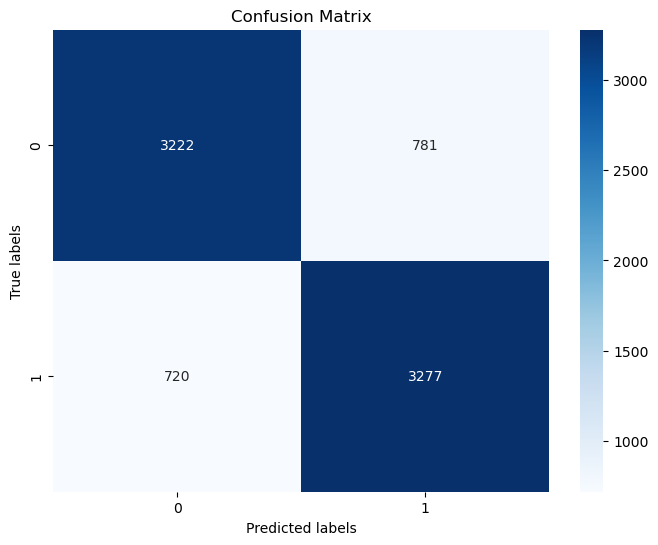

In [220]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

[0.8173516  0.80754066]
[0.80489633 0.8198649 ]


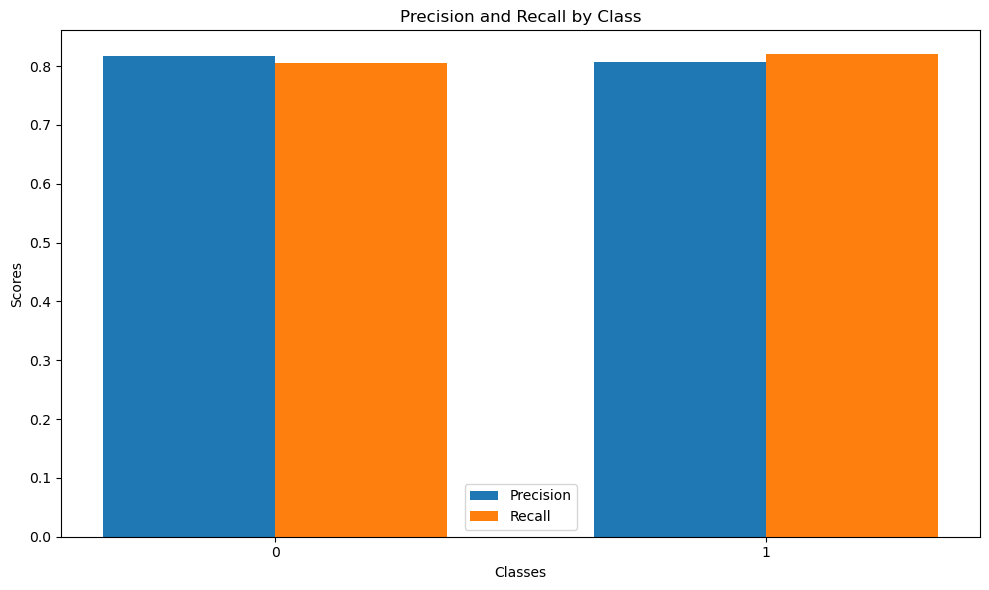

In [221]:
from sklearn.metrics import precision_score, recall_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Calculate precision and recall
precisions = precision_score(y_test, y_pred, average=None)
recalls = recall_score(y_test, y_pred, average=None)
print(precisions)
print(recalls)
# Now you can use the code to plot precision and recall
import matplotlib.pyplot as plt
import numpy as np

classes = np.arange(len(precisions))

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(classes, precisions, bar_width, label='Precision')
plt.bar(classes + bar_width, recalls, bar_width, label='Recall')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision and Recall by Class')
plt.xticks(classes + bar_width / 2, classes)
plt.legend()

plt.tight_layout()
plt.show()


In [63]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [44]:
# import joblib

# # Assuming 'clf' is your trained model
# joblib.dump(clf, 'TrainedModel1.pkl')


['TrainedModel1.pkl']

In [50]:
# df.to_csv("output.csv" , index= False)

In [51]:
# df2 = pd.DataFrame({
#                    'actual':y_test,
#                   'prediction':predictions})

In [52]:
# # Filter rows where 'label' is equal to 'prediction'
# result_df = df2[df2['actual']!=df2['prediction']]

# # Display the resulting DataFrame
# print(result_df)


In [53]:
# matching_indexes = result_df.index

In [54]:
# matching_values = df2.loc[matching_indexes]


In [55]:
# df = pd.read_csv("new_data1.csv")

In [56]:
# df = df.drop(matching_indexes)

In [57]:
# df.to_csv('new_data1.csv',index=False)

In [222]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')  # Use 'macro' for multiclass classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')  # Use 'macro' for multiclass classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')  # Use 'macro' for multiclass classification

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.8124461292986851
Recall: 0.8123806132140949
F1 Score: 0.8123661313679278


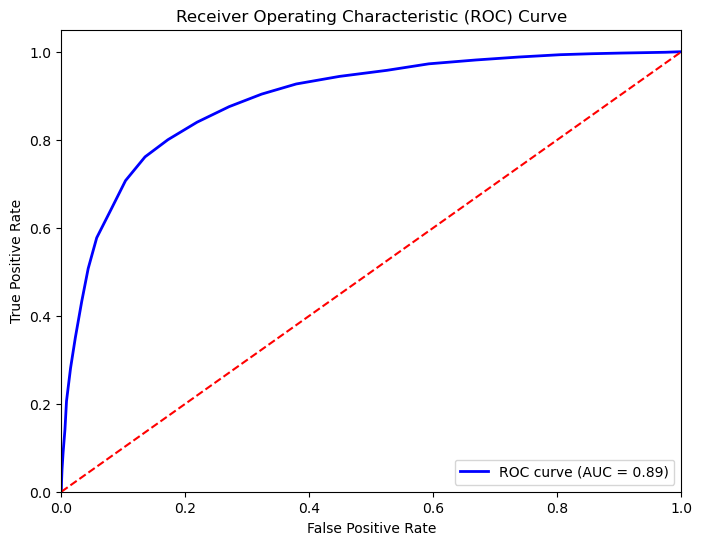

In [225]:
from sklearn.metrics import roc_curve, roc_auc_score
# Assuming clf is your trained RandomForest classifier
# Get out-of-bag decision function scores
y_scores = np.mean([tree.predict(X_test) for tree in clf.trees], axis=0)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [224]:
import pickle 
from sklearn.metrics import accuracy_score

with open("TrainedModel10.pkl" , "rb") as file:
    loaded_model = pickle.load(file)

# Initialize an empty list to store predictions
y_pred = []

# Iterate over each row in X_test and make predictions
for row in X_test:
    prediction = loaded_model.predict(row.reshape(1, -1))  # Reshape the row to ensure it's a 2D array
    y_pred.append(prediction)

# Convert the list of predictions to a numpy array
y_pred = np.array(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.812375


In [226]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# import numpy as np

# # Assuming X_train and y_train are your training features and labels
# # Create a logistic regression classifier
# clf = LogisticRegression()

# # Define the number of folds for cross-validation
# k = 5
# # Create a KFold object
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# # Perform K-fold cross-validation
# cv_scores = cross_val_score(clf, X_train, y_train, cv=kf)

# # Print the cross-validation scores
# print("Cross-validation scores:", cv_scores)

# # Calculate and print the average score
# avg_score = np.mean(cv_scores)
# print("Average cross-validation score:", avg_score)
